# logistic_regression

In [51]:
#import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
dataset = pd.read_csv("Social_Network_Ads.csv")
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [53]:
X = dataset.iloc[:,[2,3]].values
y = dataset.iloc[:,-1].values

In [54]:
y

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,

# splitting dataset into training and test set

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test   = train_test_split(X , y , test_size = 0.2, random_state=0)

# feature scaling

In [56]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test =sc.fit_transform(X_test)

fitting the logistic regression model to training set (X_train)

In [57]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

predict on the test data and compare it with actual value 

In [58]:
y_predicted = classifier.predict(X_test)
y_predicted

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1], dtype=int64)

In [59]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], dtype=int64)

creating a confusion matrix using confusion_matrix() function from metrics library

In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[52,  6],
       [ 3, 19]], dtype=int64)

# conclusion from confusion matrix

In [62]:
#52+19 = 71 correct prediction
# 6+3=9 wrong predictions

# visualization code

# training set

In [63]:
X_set = X_train
y_set = y_train

In [64]:
X1 , X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01), np.arange(start =X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01 ))

In [65]:
from matplotlib.colors import ListedColormap

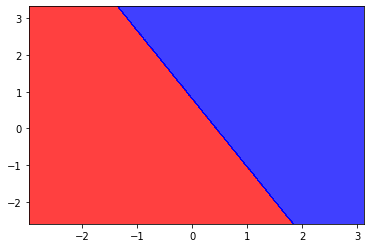

In [78]:
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('red','blue')))

(-2.5913815646031484, 3.3186184353967256)

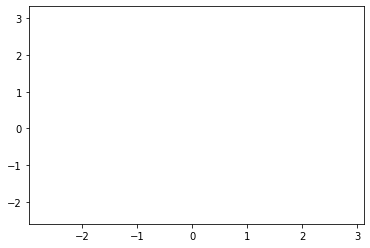

In [67]:
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())


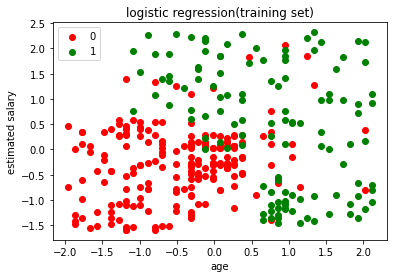

In [74]:
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set == j,1], color = ListedColormap(('red','green'))(i),label=j)
plt.title('logistic regression(training set)')
plt.xlabel('age')
plt.ylabel('estimated salary')
plt.legend()
plt.show()

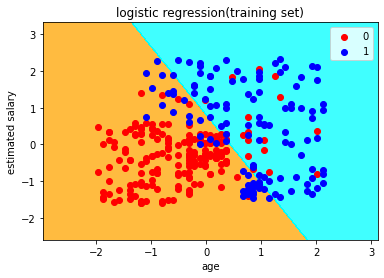

In [87]:
X_set = X_train
y_set = y_train
X1 , X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01), np.arange(start =X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01 ))
from matplotlib.colors import ListedColormap
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('orange','cyan')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set == j,1], color = ListedColormap(('red','blue'))(i),label=j)
plt.title('logistic regression(training set)')
plt.xlabel('age')
plt.ylabel('estimated salary')
plt.legend()
plt.show()

# testing set

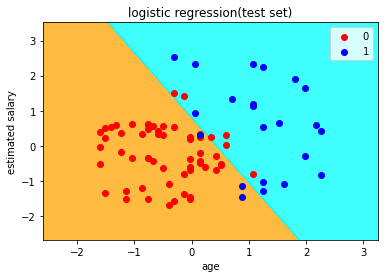

In [89]:
X_set = X_test
y_set = y_test
X1 , X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop = X_set[:,0].max()+1, step = 0.01), np.arange(start =X_set[:,1].min()-1, stop = X_set[:,1].max()+1, step = 0.01 ))
from matplotlib.colors import ListedColormap
plt.contourf(X1,X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), alpha = 0.75, cmap = ListedColormap(('orange','cyan')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set == j,1], color = ListedColormap(('red','blue'))(i),label=j)
plt.title('logistic regression(test set)')
plt.xlabel('age')
plt.ylabel('estimated salary')
plt.legend()
plt.show()